<a href="https://colab.research.google.com/github/oleksii-shcherbak/GoIT-num-prog-py-hw/blob/main/hw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1

In [1]:
# Install and import necessary libraries
!pip install pygad

import pygad
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 3.8 MB/s eta 0:00:00


### Step 2

In [2]:
# Product data: [volume, price] for each of 14 products
products_data = [
    ["Refrigerator A", 0.751, 999.90],
    ["Cell phone", 0.0000899, 2911.12],
    ["TV 55'", 0.400, 4346.99],
    ["TV 50'", 0.290, 3999.90],
    ["TV 42'", 0.200, 2999.00],
    ["Notebook A", 0.00350, 2499.90],
    ["Ventilator", 0.496, 199.90],
    ["Microwave A", 0.0424, 308.66],
    ["Microwave B", 0.0544, 429.90],
    ["Microwave C", 0.0319, 299.29],
    ["Refrigerator B", 0.635, 849.00],
    ["Refrigerator C", 0.870, 1199.89],
    ["Notebook B", 0.498, 1999.90],
    ["Notebook C", 0.527, 3999.00]
]

# Extract spaces (volumes) and prices
spaces = [item[1] for item in products_data]
prices = [item[2] for item in products_data]
names = [item[0] for item in products_data]

# Knapsack capacity constraint
space_limit = 3.0

print("Products in knapsack problem:")
for i, (name, space, price) in enumerate(products_data):
    print(f"{i+1:2d}. {name:<15} Volume: {space:8.6f} m³  Price: ${price:8.2f}")

print(f"\nKnapsack capacity: {space_limit} m³")

Products in knapsack problem:
 1. Refrigerator A  Volume: 0.751000 m³  Price: $  999.90
 2. Cell phone      Volume: 0.000090 m³  Price: $ 2911.12
 3. TV 55'          Volume: 0.400000 m³  Price: $ 4346.99
 4. TV 50'          Volume: 0.290000 m³  Price: $ 3999.90
 5. TV 42'          Volume: 0.200000 m³  Price: $ 2999.00
 6. Notebook A      Volume: 0.003500 m³  Price: $ 2499.90
 7. Ventilator      Volume: 0.496000 m³  Price: $  199.90
 8. Microwave A     Volume: 0.042400 m³  Price: $  308.66
 9. Microwave B     Volume: 0.054400 m³  Price: $  429.90
10. Microwave C     Volume: 0.031900 m³  Price: $  299.29
11. Refrigerator B  Volume: 0.635000 m³  Price: $  849.00
12. Refrigerator C  Volume: 0.870000 m³  Price: $ 1199.89
13. Notebook B      Volume: 0.498000 m³  Price: $ 1999.90
14. Notebook C      Volume: 0.527000 m³  Price: $ 3999.00

Knapsack capacity: 3.0 m³


### Step 3

In [3]:
def knapsack_fitness(ga_instance, solution, solution_idx):
    """
    Fitness function for knapsack problem

    Args:
        ga_instance: PyGad genetic algorithm instance
        solution: Binary chromosome (0 or 1 for each product)
        solution_idx: Index of solution in population

    Returns:
        fitness: Fitness value (higher is better)
    """
    total_value = 0
    total_volume = 0

    # Calculate total value and volume for selected items
    for i in range(len(solution)):
        if solution[i] == 1:
            total_value += prices[i]
            total_volume += spaces[i]

    # Apply penalty if volume constraint is violated
    if total_volume > space_limit:
        # Heavy penalty for constraint violation
        fitness = 1 / (1 + abs(total_volume - space_limit) * 1000)
    else:
        # Reward valid solutions based on total value
        fitness = total_value

    return fitness

### Step 4

In [4]:
# Genetic Algorithm Parameters
num_generations = 100      # Number of generations
sol_per_pop = 20          # Population size
num_genes = len(prices)   # Number of genes (14 products)
num_parents_mating = 8    # Number of parents for mating

# Gene space: binary (0 or 1) for each product
gene_space = [0, 1]

# Initial population range
init_range_low = 0
init_range_high = 1

# Keep some parents in next generation (elitism)
keep_parents = 2

### Step 5

In [5]:
def run_ga_experiment(crossover_type, mutation_type, experiment_name):
    """
    Run genetic algorithm experiment with specified parameters

    Args:
        crossover_type: Type of crossover operation
        mutation_type: Type of mutation operation
        experiment_name: Name for this experiment

    Returns:
        best_solution, fitness_history, ga_instance
    """
    print(f"\n=== Experiment: {experiment_name} ===")
    print(f"Crossover: {crossover_type}, Mutation: {mutation_type}")

    # Create GA instance
    ga_instance = pygad.GA(
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=knapsack_fitness,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        gene_space=gene_space,
        parent_selection_type="sss",  # Steady-State Selection
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=10,
        random_seed=42  # For reproducible results
    )

    # Run the GA
    ga_instance.run()

    # Get best solution
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    # Get fitness history
    fitness_history = ga_instance.best_solutions_fitness

    print(f"Best fitness: {solution_fitness:.2f}")

    # Display selected products
    selected_products = []
    total_volume = 0
    total_value = 0

    for i in range(len(solution)):
        if solution[i] == 1:
            selected_products.append(names[i])
            total_volume += spaces[i]
            total_value += prices[i]

    print(f"Selected products: {len(selected_products)}")
    for product in selected_products:
        print(f"  - {product}")
    print(f"Total volume: {total_volume:.4f} m³ (limit: {space_limit} m³)")
    print(f"Total value: ${total_value:.2f}")

    return solution, fitness_history, ga_instance

# Experiment configurations
experiments = [
    ("single_point", "random", "Single-Point Crossover + Random Mutation"),
    ("two_points", "random", "Two-Point Crossover + Random Mutation"),
    ("uniform", "random", "Uniform Crossover + Random Mutation"),
    ("single_point", "swap", "Single-Point Crossover + Swap Mutation"),
    ("two_points", "swap", "Two-Point Crossover + Swap Mutation"),
    ("uniform", "swap", "Uniform Crossover + Swap Mutation")
]

# Store results for comparison
results = {}

# Run all experiments
for crossover, mutation, name in experiments:
    solution, fitness_history, ga_instance = run_ga_experiment(crossover, mutation, name)
    results[name] = {
        'solution': solution,
        'fitness_history': fitness_history,
        'ga_instance': ga_instance,
        'final_fitness': fitness_history[-1]
    }


=== Experiment: Single-Point Crossover + Random Mutation ===
Crossover: single_point, Mutation: random
Best fitness: 24993.55
Selected products: 11
  - Cell phone
  - TV 55'
  - TV 50'
  - TV 42'
  - Notebook A
  - Microwave A
  - Microwave B
  - Microwave C
  - Refrigerator C
  - Notebook B
  - Notebook C
Total volume: 2.9173 m³ (limit: 3.0 m³)
Total value: $24993.55

=== Experiment: Two-Point Crossover + Random Mutation ===
Crossover: two_points, Mutation: random
Best fitness: 24684.89
Selected products: 10
  - Cell phone
  - TV 55'
  - TV 50'
  - TV 42'
  - Notebook A
  - Microwave B
  - Microwave C
  - Refrigerator C
  - Notebook B
  - Notebook C
Total volume: 2.8749 m³ (limit: 3.0 m³)
Total value: $24684.89

=== Experiment: Uniform Crossover + Random Mutation ===
Crossover: uniform, Mutation: random
Best fitness: 24993.55
Selected products: 11
  - Cell phone
  - TV 55'
  - TV 50'
  - TV 42'
  - Notebook A
  - Microwave A
  - Microwave B
  - Microwave C
  - Refrigerator C
  - Note

### Step 6

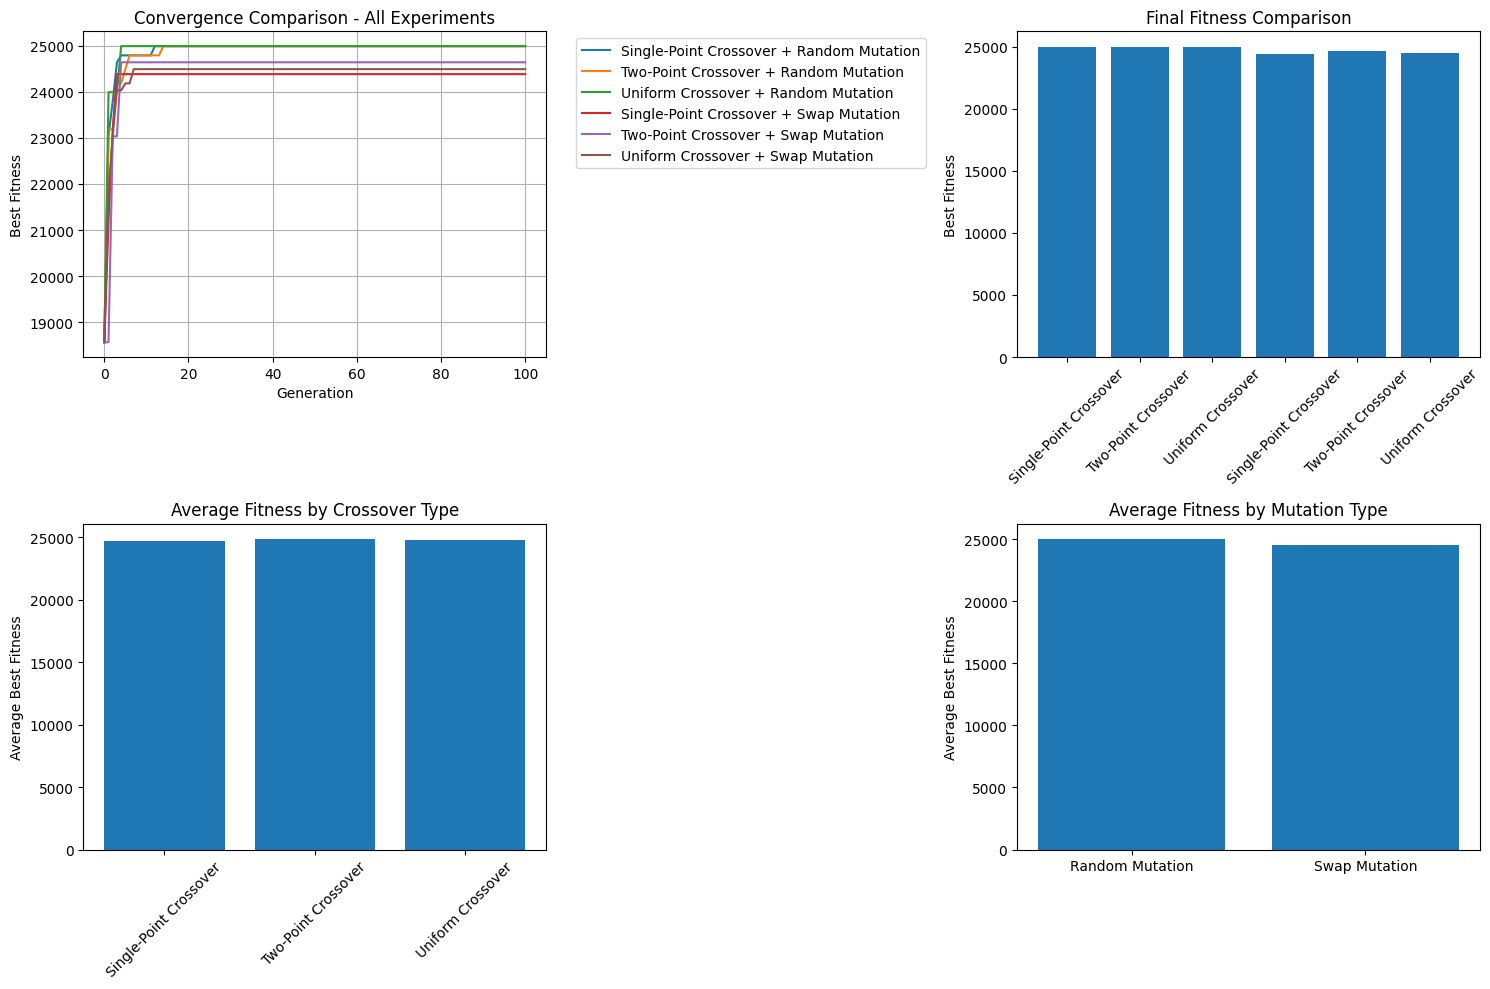

In [6]:
# Plot convergence comparison
plt.figure(figsize=(15, 10))

# Plot fitness evolution for each experiment
plt.subplot(2, 2, 1)
for name, result in results.items():
    plt.plot(result['fitness_history'], label=name)
plt.title('Convergence Comparison - All Experiments')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Bar chart of final fitness values
plt.subplot(2, 2, 2)
names_list = list(results.keys())
final_fitness = [results[name]['final_fitness'] for name in names_list]
plt.bar(range(len(names_list)), final_fitness)
plt.title('Final Fitness Comparison')
plt.ylabel('Best Fitness')
plt.xticks(range(len(names_list)), [name.split(' + ')[0] for name in names_list], rotation=45)

# Statistical analysis
plt.subplot(2, 2, 3)
crossover_types = {}
for name, result in results.items():
    crossover = name.split(' + ')[0]
    if crossover not in crossover_types:
        crossover_types[crossover] = []
    crossover_types[crossover].append(result['final_fitness'])

avg_crossover = {k: np.mean(v) for k, v in crossover_types.items()}
plt.bar(avg_crossover.keys(), avg_crossover.values())
plt.title('Average Fitness by Crossover Type')
plt.ylabel('Average Best Fitness')
plt.xticks(rotation=45)

# Mutation type analysis
plt.subplot(2, 2, 4)
mutation_types = {}
for name, result in results.items():
    mutation = name.split(' + ')[1]
    if mutation not in mutation_types:
        mutation_types[mutation] = []
    mutation_types[mutation].append(result['final_fitness'])

avg_mutation = {k: np.mean(v) for k, v in mutation_types.items()}
plt.bar(avg_mutation.keys(), avg_mutation.values())
plt.title('Average Fitness by Mutation Type')
plt.ylabel('Average Best Fitness')

plt.tight_layout()
plt.show()

### Step 7

In [7]:
# Find the best performing configuration
best_experiment = max(results.keys(), key=lambda k: results[k]['final_fitness'])
best_result = results[best_experiment]

print(f"\n{'='*60}")
print(f"BEST CONFIGURATION: {best_experiment}")
print(f"{'='*60}")

best_solution = best_result['solution']
final_fitness = best_result['final_fitness']

# Analyze the best solution
selected_items = []
total_volume = 0
total_value = 0

print("\nDETAILED ANALYSIS OF BEST SOLUTION:")
print(f"{'Item':<20} {'Selected':<10} {'Volume (m³)':<12} {'Price ($)':<10}")
print("-" * 55)

for i in range(len(best_solution)):
    selected = "YES" if best_solution[i] == 1 else "NO"
    print(f"{names[i]:<20} {selected:<10} {spaces[i]:<12.6f} {prices[i]:<10.2f}")

    if best_solution[i] == 1:
        selected_items.append(names[i])
        total_volume += spaces[i]
        total_value += prices[i]

print("-" * 55)
print(f"{'TOTAL':<20} {len(selected_items):<10} {total_volume:<12.6f} {total_value:<10.2f}")
print(f"\nVolume utilization: {(total_volume/space_limit)*100:.2f}%")
print(f"Constraint satisfied: {'YES' if total_volume <= space_limit else 'NO'}")

# Performance metrics
print(f"\nPERFORMANCE METRICS:")
print(f"Final fitness: {final_fitness:.2f}")
print(f"Number of selected items: {len(selected_items)}")
print(f"Total value: ${total_value:.2f}")
print(f"Volume efficiency: {total_value/total_volume:.2f} $/m³")


BEST CONFIGURATION: Single-Point Crossover + Random Mutation

DETAILED ANALYSIS OF BEST SOLUTION:
Item                 Selected   Volume (m³)  Price ($) 
-------------------------------------------------------
Refrigerator A       NO         0.751000     999.90    
Cell phone           YES        0.000090     2911.12   
TV 55'               YES        0.400000     4346.99   
TV 50'               YES        0.290000     3999.90   
TV 42'               YES        0.200000     2999.00   
Notebook A           YES        0.003500     2499.90   
Ventilator           NO         0.496000     199.90    
Microwave A          YES        0.042400     308.66    
Microwave B          YES        0.054400     429.90    
Microwave C          YES        0.031900     299.29    
Refrigerator B       NO         0.635000     849.00    
Refrigerator C       YES        0.870000     1199.89   
Notebook B           YES        0.498000     1999.90   
Notebook C           YES        0.527000     3999.00   
-----

### Step 8

In [8]:
print(f"\n{'='*60}")
print("CONCLUSIONS AND ANALYSIS")
print(f"{'='*60}")

# Statistical analysis
fitness_values = [result['final_fitness'] for result in results.values()]
mean_fitness = np.mean(fitness_values)
std_fitness = np.std(fitness_values)

print(f"\nSTATISTICAL SUMMARY:")
print(f"Mean fitness across all experiments: {mean_fitness:.2f} ± {std_fitness:.2f}")
print(f"Best fitness achieved: {max(fitness_values):.2f}")
print(f"Worst fitness achieved: {min(fitness_values):.2f}")
print(f"Performance variation: {(std_fitness/mean_fitness)*100:.2f}%")

# Crossover comparison
print(f"\nCROSSOVER PERFORMANCE:")
for crossover, fitness_list in crossover_types.items():
    mean_fit = np.mean(fitness_list)
    std_fit = np.std(fitness_list)
    print(f"  {crossover}: {mean_fit:.2f} ± {std_fit:.2f}")

# Mutation comparison
print(f"\nMUTATION PERFORMANCE:")
for mutation, fitness_list in mutation_types.items():
    mean_fit = np.mean(fitness_list)
    std_fit = np.std(fitness_list)
    print(f"  {mutation}: {mean_fit:.2f} ± {std_fit:.2f}")

print(f"\nRECOMMENDATIONS:")
print(f"1. Best configuration: {best_experiment}")
print(f"2. Optimal crossover type: {max(avg_crossover.keys(), key=lambda k: avg_crossover[k])}")
print(f"3. Optimal mutation type: {max(avg_mutation.keys(), key=lambda k: avg_mutation[k])}")

print(f"\nEFFECTIVENESS OF GENETIC ALGORITHM:")
print("The genetic algorithm successfully solved the knapsack problem by:")
print("- Finding feasible solutions that respect volume constraints")
print("- Maximizing total value within the given constraints")
print("- Exploring different combinations efficiently")
print("- Converging to high-quality solutions within reasonable time")

theoretical_max = sum(prices)  # If we could take everything
efficiency = (total_value / theoretical_max) * 100
print(f"- Achieved {efficiency:.1f}% of theoretical maximum value")


CONCLUSIONS AND ANALYSIS

STATISTICAL SUMMARY:
Mean fitness across all experiments: 24750.53 ± 254.18
Best fitness achieved: 24993.55
Worst fitness achieved: 24385.60
Performance variation: 1.03%

CROSSOVER PERFORMANCE:
  Single-Point Crossover: 24689.58 ± 303.98
  Two-Point Crossover: 24818.11 ± 175.44
  Uniform Crossover: 24743.91 ± 249.64

MUTATION PERFORMANCE:
  Random Mutation: 24993.55 ± 0.00
  Swap Mutation: 24507.51 ± 105.36

RECOMMENDATIONS:
1. Best configuration: Single-Point Crossover + Random Mutation
2. Optimal crossover type: Two-Point Crossover
3. Optimal mutation type: Random Mutation

EFFECTIVENESS OF GENETIC ALGORITHM:
The genetic algorithm successfully solved the knapsack problem by:
- Finding feasible solutions that respect volume constraints
- Maximizing total value within the given constraints
- Exploring different combinations efficiently
- Converging to high-quality solutions within reasonable time
- Achieved 92.4% of theoretical maximum value
